## Data

In [6]:
!pip install geopy

In [7]:
!pip install folium

In [1]:
import numpy as np
import pandas as pd
import json
from geopy.geocoders import Nominatim
import requests
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as color
from sklearn.cluster import KMeans
import folium
from bs4 import BeautifulSoup
import regex as re

In [2]:
address = '4047 Bremo Recess, New Albany, OH 43054'
street = '4047 Bremo Recess'
city = 'New Albany'
state = 'OH'
zipcode = '43054'
geolocator = Nominatim(user_agent = 'calc')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of {} are ({}, {}).'.format(address, latitude, longitude))

The geograpical coordinates of 4047 Bremo Recess, New Albany, OH 43054 are (40.05713082828283, -82.83462975757575).


In [3]:
map = folium.Map(location = [latitude, longitude], zoom_start = 100)
map

## Foursquare API

In [4]:
CLIENT_ID = 'RN530BC0LUAPUIO15YIWGNE0NKN3OWUM4CE4EF5YAL1PKGK2' # your Foursquare ID
CLIENT_SECRET = 'PEFFPSDRAKNQNDMRXK5HGWUHVDFEAWTL5P4AOM11SZTMVMOO' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: RN530BC0LUAPUIO15YIWGNE0NKN3OWUM4CE4EF5YAL1PKGK2
CLIENT_SECRET:PEFFPSDRAKNQNDMRXK5HGWUHVDFEAWTL5P4AOM11SZTMVMOO


In [6]:
radius = 500
LIMIT = 100
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)

In [7]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '61313ef7746eb777260db9c7'},
 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."},
  'headerLocation': 'New Albany',
  'headerFullLocation': 'New Albany',
  'headerLocationGranularity': 'city',
  'totalResults': 2,
  'suggestedBounds': {'ne': {'lat': 40.06163083278283,
    'lng': -82.82876147414711},
   'sw': {'lat': 40.05263082378283, 'lng': -82.8404980410044}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4e0dfd03d164fff335a6963a',
       'name': 'James Rive Park',
       'location': {'crossStreet': 'James River Road',
        'lat': 40.05481447144339,
        'lng': -82.83211952269191,
        'labeledLatLngs': [{'label': 'display',

In [8]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [12]:
venues = results['response']['groups'][0]['items']
    
venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.location.city', 'venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
venues = venues.loc[:, filtered_columns]

# filter the category for each row
venues['venue.categories'] = venues.apply(get_category_type, axis=1)

# clean columns
venues.columns = [col.split(".")[-1] for col in venues.columns]

venues

<ipython-input-12-8a40b3f0839e>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  venues = json_normalize(venues) # flatten JSON


,city,name,categories,lat,lng
0,New Albany,James Rive Park,Park,40.054814,-82.832120
1,Gahanna,Smith's Market Express,Farmers Market,40.053827,-82.831388


In [14]:
venues = venues.rename(columns = {'city': 'City', 'name': 'Name', 'categories': 'Categories', 'lat': 'Latitude', 'lng': 'Longitude'})

In [16]:
print('There are {} venues near the address that were returned by Foursquare.'.format(ucvenues.shape[0]))

There are 2 venues near the address that were returned by Foursquare.


In [17]:
print(venues.shape)
venues.head()

(2, 5)


,City,Name,Categories,Latitude,Longitude
0,New Albany,James Rive Park,Park,40.054814,-82.832120
1,Gahanna,Smith's Market Express,Farmers Market,40.053827,-82.831388


## Exploratory Data Analysis

In [20]:
df.plot.barh(x = 'University', y = 'Acceptance Rate', title = 'Acceptance Rates')

NameError: name 'df' is not defined

NameError: name 'df' is not defined

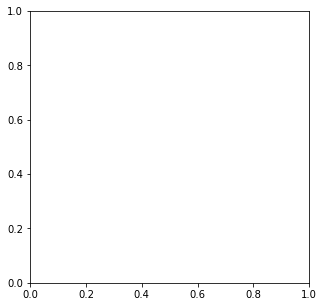

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
df.plot(kind='bar', y='Total Tuition', x='University',
        align='center', edgecolor='none', 
        color='green', ax=ax)

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.xticks(rotation=25)

plt.show()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
df.plot(kind='bar', y='Percent Completed BA', x='University',
        align='center', edgecolor='none', 
        color='blue', ax=ax)

fmt = '{x:.0f}%'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.xticks(rotation=25)

plt.show()

In [ ]:
# one hot encoding
uconehot = pd.get_dummies(ucvenues[['Categories']], prefix="", prefix_sep="")

uconehot['City'] = ucvenues['City']

fixed_columns = [uconehot.columns[-1]] + list(uconehot.columns[:-1])
uconehot = uconehot[fixed_columns]

uconehot.head()

In [ ]:
uconehot.shape

In [ ]:
ucgrouped = uconehot.groupby('City').mean().reset_index()
ucgrouped

In [ ]:
ucgrouped.shape

In [ ]:
num_top_venues = 5

for hood in ucgrouped['City']:
    print("----"+hood+"----")
    temp = ucgrouped[ucgrouped['City'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

In [ ]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [ ]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['City'] = ucgrouped['City']

for ind in np.arange(ucgrouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(ucgrouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

In [ ]:
# set number of clusters
kclusters = 1

ucgrouped_clustering = ucgrouped.drop('City', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(ucgrouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

In [ ]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

ucmerged = ucvenues

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
ucmerged = ucmerged.join(neighborhoods_venues_sorted.set_index('City'), on='City')

ucmerged.head() # check the last columns!

In [ ]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=15)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(ucmerged['Latitude'], ucmerged['Longitude'], ucmerged['City'], ucmerged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        #color=rainbow[cluster-1],
        fill=True,
        #fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [ ]:
# one hot encoding
umdonehot = pd.get_dummies(umdvenues[['Categories']], prefix="", prefix_sep="")

umdonehot['City'] = umdvenues['City']

fixed_columns = [umdonehot.columns[-1]] + list(umdonehot.columns[:-1])
umdonehot = umdonehot[fixed_columns]

umdonehot.head()

In [ ]:
umdonehot.shape

In [ ]:
umdgrouped = umdonehot.groupby('City').mean().reset_index()
umdgrouped

In [ ]:
umdgrouped.shape

In [ ]:
num_top_venues = 5

for hood in umdgrouped['City']:
    print("----"+hood+"----")
    temp = umdgrouped[umdgrouped['City'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

In [ ]:
umdnum_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
umdneighborhoods_venues_sorted = pd.DataFrame(columns=columns)
umdneighborhoods_venues_sorted['City'] = umdgrouped['City']

for ind in np.arange(ucgrouped.shape[0]):
    umdneighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(umdgrouped.iloc[ind, :], umdnum_top_venues)

umdneighborhoods_venues_sorted.head()

In [ ]:
# set number of clusters
kclusters = 1

umdgrouped_clustering = umdgrouped.drop('City', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(umdgrouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

In [ ]:
# add clustering labels
umdneighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

umdmerged = umdvenues

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
umdmerged = umdmerged.join(umdneighborhoods_venues_sorted.set_index('City'), on='City')

umdmerged.head() # check the last columns!

In [ ]:
# create map
umdmap_clusters = folium.Map(location=[latitude_umd, longitude_umd], zoom_start=15)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(umdmerged['Latitude'], umdmerged['Longitude'], umdmerged['City'], umdmerged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        #color=rainbow[cluster-1],
        fill=True,
        #fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(umdmap_clusters)
       
umdmap_clusters

In [ ]:
ucCoffee = ucvenues.loc[ucvenues['Categories'] == 'Coffee Shop']

In [ ]:
umdCoffee = umdvenues.loc[umdvenues['Categories'] == 'Coffee Shop']

In [ ]:
ucCafe = ucvenues.loc[ucvenues['Categories'] == 'Café']

In [ ]:
umdCafe = umdvenues.loc[umdvenues['Categories'] == 'Café']

In [ ]:
coffee = pd.concat([ucCoffee, umdCoffee])
coffee = pd.concat([coffee, umdCafe])
coffee = pd.concat([coffee, ucCafe]).reset_index(drop = True)
coffee

In [ ]:
ucmerged.loc[ucmerged['Cluster Labels'] == 0, ucmerged.columns[[1] + list(range(5, ucmerged.shape[1]))]]

In [ ]:
umdmerged.loc[umdmerged['Cluster Labels'] == 0, umdmerged.columns[[1] + list(range(5, umdmerged.shape[1]))]]